In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cilium_tc_iperf_array = [835, 849, 859, 860, 886, 869, 850, 873, 825, 822, 890, 852, 857, 875, 862, 881, 859, 877, 858, 860]
cilium_socketlb_iperf_array = [872, 862, 864, 857, 843, 838, 869, 872, 870, 877, 877, 874, 874, 876, 865, 855, 855, 854, 856, 864]
crab_tc_iperf_array = [768, 764, 806, 760, 787, 777, 780, 771, 776, 779, 756, 761, 797, 780, 823, 771, 753, 814, 757, 793]

In [61]:
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(cilium_socketlb_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std_devs = [np.std(cilium_tc_iperf_array), np.std(cilium_socketlb_iperf_array), np.std(crab_tc_iperf_array)]

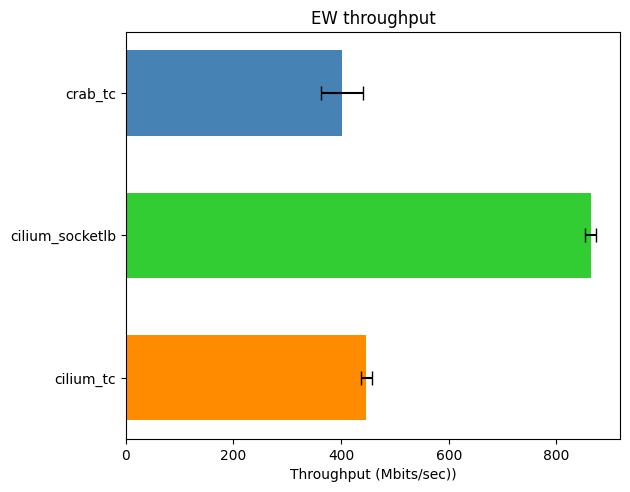

In [63]:
bar_positions = np.arange(len(iperf_means))
height = 0.6
colors = ['#FF8C00', '#32CD32', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std_devs, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'cilium_socketlb', 'crab_tc'])
plt.xlabel('Throughput (Mbits/sec))')
plt.tight_layout()
plt.title("EW throughput")
plt.show()

In [32]:
cilium_tc_ew_RR = [
    [743,830,924],
    [742,828,926],
    [744,833,928],
    [744,836,938],
    [743,833,930],
    [743,829,934],
    [744,833,934],
    [744,835,936],
    [742,831,944],
    [743,829,935],
    [743,830,938],
    [744,832,939],
    [744,834,932],
    [742,829,934],
    [743,832,934],
    [749,846,955],
    [750,849,958],
    [747,843,949],
    [749,847,949],
    [747,842,949],
]
cilium_socketlb_ew_RR = [
    [726,831,942],
    [752,856,981],
    [741,846,959],
    [720,821,917],
    [725,832,947],
    [724,827,935],
    [715,811,907],
    [716,811,910],
    [716,817,920],
    [737,841,961],
    [721,821,924],
    [725,831,948],
    [744,847,956],
    [714,810,913],
    [715,811,910],
    [728,831,944],
    [727,828,940],
    [715,812,914],
    [716,812,924],
    [714,811,908],
]
crab_tc_ew_RR = [
    [802,886,1038],
    [803,884,1031],
    [804,884,1021],
    [806,900,1065],
    [803,887,1049],
    [802,879,1023],
    [804,888,1017],
    [804,889,1034],
    [802,884,1019],
    [803,883,1031],
]

cilium_tc_ew_RR_50per = [x[0] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_50per = [x[0] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_50per = [x[0] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_90per = [x[1] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_90per = [x[1] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_90per = [x[1] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_99per = [x[2] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_99per = [x[2] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_99per = [x[2] for x in crab_tc_ew_RR]

ew_RR_50per_means = [np.mean(cilium_tc_ew_RR_50per), np.mean(cilium_socketlb_ew_RR_50per), np.mean(crab_tc_ew_RR_50per)]
ew_RR_90per_means = [np.mean(cilium_tc_ew_RR_90per), np.mean(cilium_socketlb_ew_RR_90per), np.mean(crab_tc_ew_RR_90per)]
ew_RR_99per_means = [np.mean(cilium_tc_ew_RR_99per), np.mean(cilium_socketlb_ew_RR_99per), np.mean(crab_tc_ew_RR_99per)]

ew_RR_50per_stds = [np.std(cilium_tc_ew_RR_50per), np.std(cilium_socketlb_ew_RR_50per), np.std(crab_tc_ew_RR_50per)]
ew_RR_90per_stds = [np.std(cilium_tc_ew_RR_90per), np.std(cilium_socketlb_ew_RR_90per), np.std(crab_tc_ew_RR_90per)]
ew_RR_99per_stds = [np.std(cilium_tc_ew_RR_99per), np.std(cilium_socketlb_ew_RR_99per), np.std(crab_tc_ew_RR_99per)]


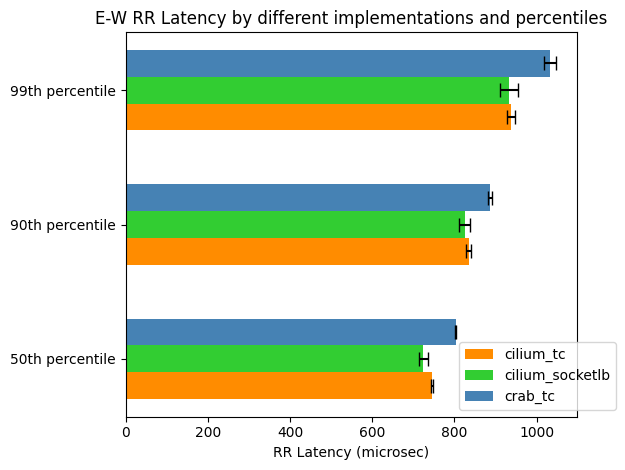

In [64]:

percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_RR_50per_means, ew_RR_50per_stds), 
                                  (ew_RR_90per_means, ew_RR_90per_stds), 
                                  (ew_RR_99per_means, ew_RR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('RR Latency (microsec)')
ax.set_title('E-W RR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0))

plt.tight_layout()
plt.show()

In [57]:
cilium_tc_ew_CRR = [[3855,4211,4606], [3834,4206,4883], [3843,4193,4600], [3846,4205,4655], [3851,4225,4677], [3870,4263,4750], [3854,4210,4563], [3854,4238,5133], [3824,4188,4528], [3814,4180,4650], [3850,4226,4900], [3732,4113,4514], [3850,4197,4561], [3760,4128,4471], [3847,4204,4572], [3811,4166,4523], [3841,4195,4611], [3805,4183,4521], [3720,4116,4482], [3844,4200,5025]]
cilium_socketlb_ew_CRR = [[3854,4265,4714], [3741,4148,4500], [3747,4141,4423], [3729,4125,4442], [3733,4149,4478], [3720,4140,4457], [3749,4171,4640], [3730,4148,5000], [3738,4151,4566], [3872,4275,4766], [3760,4165,4506], [3860,4269,4711], [3635,4001,4420], [3622,3935,4353], [3618,3941,4316], [3616,3973,4376], [3619,3944,4422], [3644,4097,4514], [3734,4150,4572], [3747,4149,4478]]
crab_tc_ew_CRR = [[4793,5241,5784], [4900,5633,5700], [4791,5243,5825], [4882,5638,6850], [4699,5118,5658], [4682,5114,5662], [4710,5171,5660], [4736,5157,5616], [4751,5158,5675], [4740,5137,5720]]

cilium_tc_ew_CRR_50per = [x[0] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_50per = [x[0] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_50per = [x[0] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_90per = [x[1] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_90per = [x[1] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_90per = [x[1] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_99per = [x[2] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_99per = [x[2] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_99per = [x[2] for x in crab_tc_ew_CRR]

ew_CRR_50per_means = [np.mean(cilium_tc_ew_CRR_50per), np.mean(cilium_socketlb_ew_CRR_50per), np.mean(crab_tc_ew_CRR_50per)]
ew_CRR_90per_means = [np.mean(cilium_tc_ew_CRR_90per), np.mean(cilium_socketlb_ew_CRR_90per), np.mean(crab_tc_ew_CRR_90per)]
ew_CRR_99per_means = [np.mean(cilium_tc_ew_CRR_99per), np.mean(cilium_socketlb_ew_CRR_99per), np.mean(crab_tc_ew_CRR_99per)]

ew_CRR_50per_stds = [np.std(cilium_tc_ew_CRR_50per), np.std(cilium_socketlb_ew_CRR_50per), np.std(crab_tc_ew_CRR_50per)]
ew_CRR_90per_stds = [np.std(cilium_tc_ew_CRR_90per), np.std(cilium_socketlb_ew_CRR_90per), np.std(crab_tc_ew_CRR_90per)]
ew_CRR_99per_stds = [np.std(cilium_tc_ew_CRR_99per), np.std(cilium_socketlb_ew_CRR_99per), np.std(crab_tc_ew_CRR_99per)]

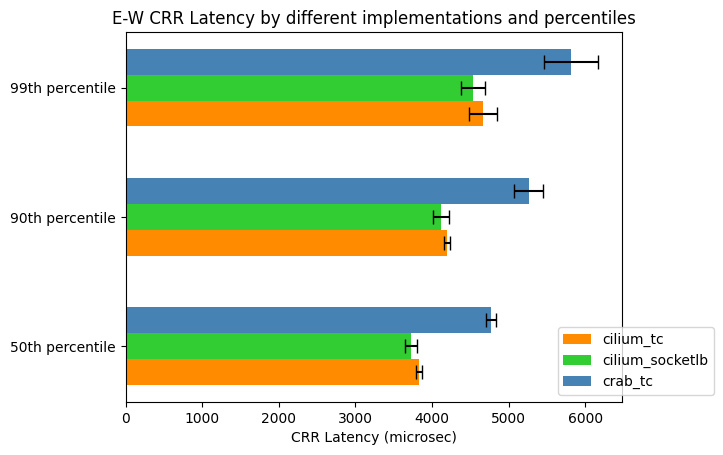

In [70]:
percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_CRR_50per_means, ew_CRR_50per_stds), 
                                  (ew_CRR_90per_means, ew_CRR_90per_stds), 
                                  (ew_CRR_99per_means, ew_CRR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('CRR Latency (microsec)')
ax.set_title('E-W CRR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

plt.show()

In [72]:
cilium_tc_iperf_array = [460, 457, 455, 435, 456, 450, 438, 425, 452, 443, 456, 458, 455, 457, 424, 436, 453, 445, 434, 454]
crab_tc_iperf_array = [429, 424, 420, 407, 414, 381, 422, 393, 421, 314, 318, 431, 425, 430, 392, 427, 427, 430, 411, 317]
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std = [np.std(cilium_tc_iperf_array), np.std(crab_tc_iperf_array)]

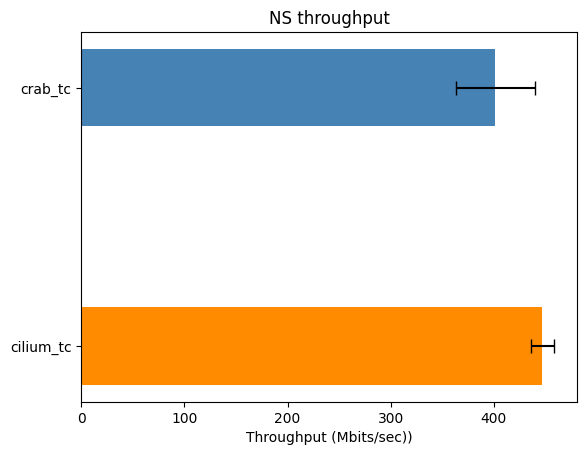

In [77]:
bar_positions = np.arange(len(iperf_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Throughput (Mbits/sec))')

plt.title("NS throughput")
plt.show()

In [82]:
cilium_tc_ns_CRR = [[1376,1586,2066], [1369,1619,2666], [1312,1530,1900], [1259,1465,1783], [1247,1442,1818], [1250,1465,2140], [1238,1420,1776], [1234,1410,1726], [1235,1413,1793], [1233,1407,1755], [1235,1418,1720], [1242,1423,2300], [1232,1411,1700], [1236,1415,1800], [1231,1419,2000], [1235,1435,1966], [1232,1411,1743], [1245,1434,1800], [1237,1416,1750], [1239,1415,1739]]
crab_tc_ns_CRR = [[1308,1500,1935], [1297,1492,1976], [1290,1484,1870], [1294,1489,1855], [1361,1605,2514], [1309,1499,1900], [1290,1487,1811], [1301,1520,2100], [1290,1487,1788], [1298,1488,1800], [1301,1492,1876], [1301,1492,1900], [1286,1481,1818], [1292,1493,2100], [1379,1585,1953], [1349,1557,1834], [1323,1533,1930], [1316,1524,1873], [1298,1492,1841], [1299,1499,2012]]

cilium_tc_ns_RR_50per = [x[0] for x in cilium_tc_ns_CRR]
cilium_tc_ns_RR_90per = [x[1] for x in cilium_tc_ns_CRR]
cilium_tc_ns_RR_99per = [x[2] for x in cilium_tc_ns_CRR]

crab_tc_ns_RR_50per = [x[0] for x in crab_tc_ns_CRR]
crab_tc_ns_RR_90per = [x[1] for x in crab_tc_ns_CRR]
crab_tc_ns_RR_99per = [x[2] for x in crab_tc_ns_CRR]

ns_CRR_50per_means = [np.mean(cilium_tc_ns_RR_50per), np.mean(crab_tc_ns_RR_50per)]
ns_CRR_90per_means = [np.mean(cilium_tc_ns_RR_90per), np.mean(crab_tc_ns_RR_90per)]
ns_CRR_99per_means = [np.mean(cilium_tc_ns_RR_99per), np.mean(crab_tc_ns_RR_99per)]

ns_CRR_50per_stds = [np.std(cilium_tc_ns_RR_50per), np.std(crab_tc_ns_RR_50per)]
ns_CRR_90per_stds = [np.std(cilium_tc_ns_RR_90per), np.std(crab_tc_ns_RR_90per)]
ns_CRR_99per_stds = [np.std(cilium_tc_ns_RR_99per), np.std(crab_tc_ns_RR_99per)]

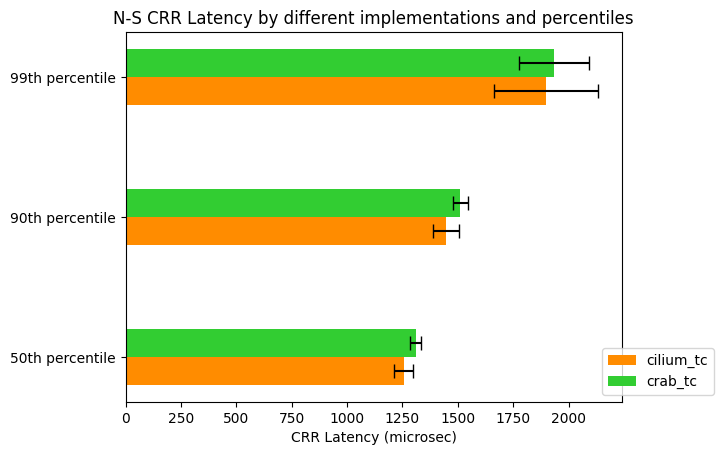

In [83]:
percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ns_CRR_50per_means, ns_CRR_50per_stds), 
                                  (ns_CRR_90per_means, ns_CRR_90per_stds), 
                                  (ns_CRR_99per_means, ns_CRR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('CRR Latency (microsec)')
ax.set_title('N-S CRR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

plt.show()